# <font color='orange'>Numerical Exercise 3</font>

## <font color='blue'>Exercise 03.1</font>
In this exercise we compute the European call-option $ C[S(0), 0] $ and put-option $ P[S(0), 0] $ prices  at time $ t=0 $. <br>
To do this I address the problem in two different ways, following Black-Scholes theory:

- **direct sampling of $ \textbf{S(T)} $** <br>
  I sample the Wiener process $ W(T) $ directly at the delivery time $T$ as
  
  $$ W(T) \sim \mathcal{N}(0,T) $$
  
  Once that is done, I simply calculate the final asset price as a Geometric Brownian Motion (**GBM**):
  
  $$ S(T) \sim GBM(\mu,\sigma^2) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right] $$
  
  where $ r $ is the risk-free interest rate (which substitute the drift to avoid arbitrage) and $ \sigma $ is
  the volatility. <br>
  At this point the target is achieved thanks to the equations
  
  \begin{align}
    C[S(0), 0] &= e^{-rT} \max\big(0, S(T)-K\big) \\
    P[S(0), 0] &= e^{-rT} \max\big(0, -S(T)+K\big)
  \end{align}
  
  where $ K $ is the strike price.


- **sampling of the discretized path $ \textbf{S(t)} $** <br>
  In this case I sample the total path of the asset price, from time $ t=0 $ to the delivery time $ t=T $, i.e. 
  I simulate the discretize GBM by dividing the total time $ [0, T] $ into $ 100 $ discrete time intervals 
  $ [t_i, t_{i+1}] $ and computing the asset price in each of this discrete times $ S(t_i) $ as 
  
  $$ 
    S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma W_{i+1}\sqrt{t_{i+1}-t_i}\right]
  $$
    
  with asset price at $ t=0 $ $ S(0) $ and $ t_1 < t_2 < … < t_n $; this time I sample a new 
  
  $$ W(t) \sim \mathcal{N}(0,1) $$
  
  in each discrete time interval.
  
I perform the procedures described above for $ M=10^4 $ Monte Carlo steps, thus being able to make a statistical analysis with the usual blocking method, using $ N_{blk} = 100 $ and the following values for the parameters of the problem

|      Parameter          | Symbol   | Value  |
|      :-:                | :-:      | :-:    |
| initial asset price     | $S(0)$   | $100$  |
| delivery time           | $T$      | $1$    |
| strike price            | $K$      | $100$  |
| risk-free interest rate | $r$      | $0.1$  |
| volatility              | $\sigma$ | $0.25$ |


Finally, I make four pictures for the estimation of the European call-option prices, $ C[S(0), 0] $ (direct and discretized), and put-option prices, $ P[S(0),0] $ (direct and discretized), with their uncertainties, as a function of the number of blocks $ N_{blk} $. <br>
I show in addition some particular GBM sampled during the simulation of the option prices.

In [1]:
#Modules
from math import pi, sqrt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

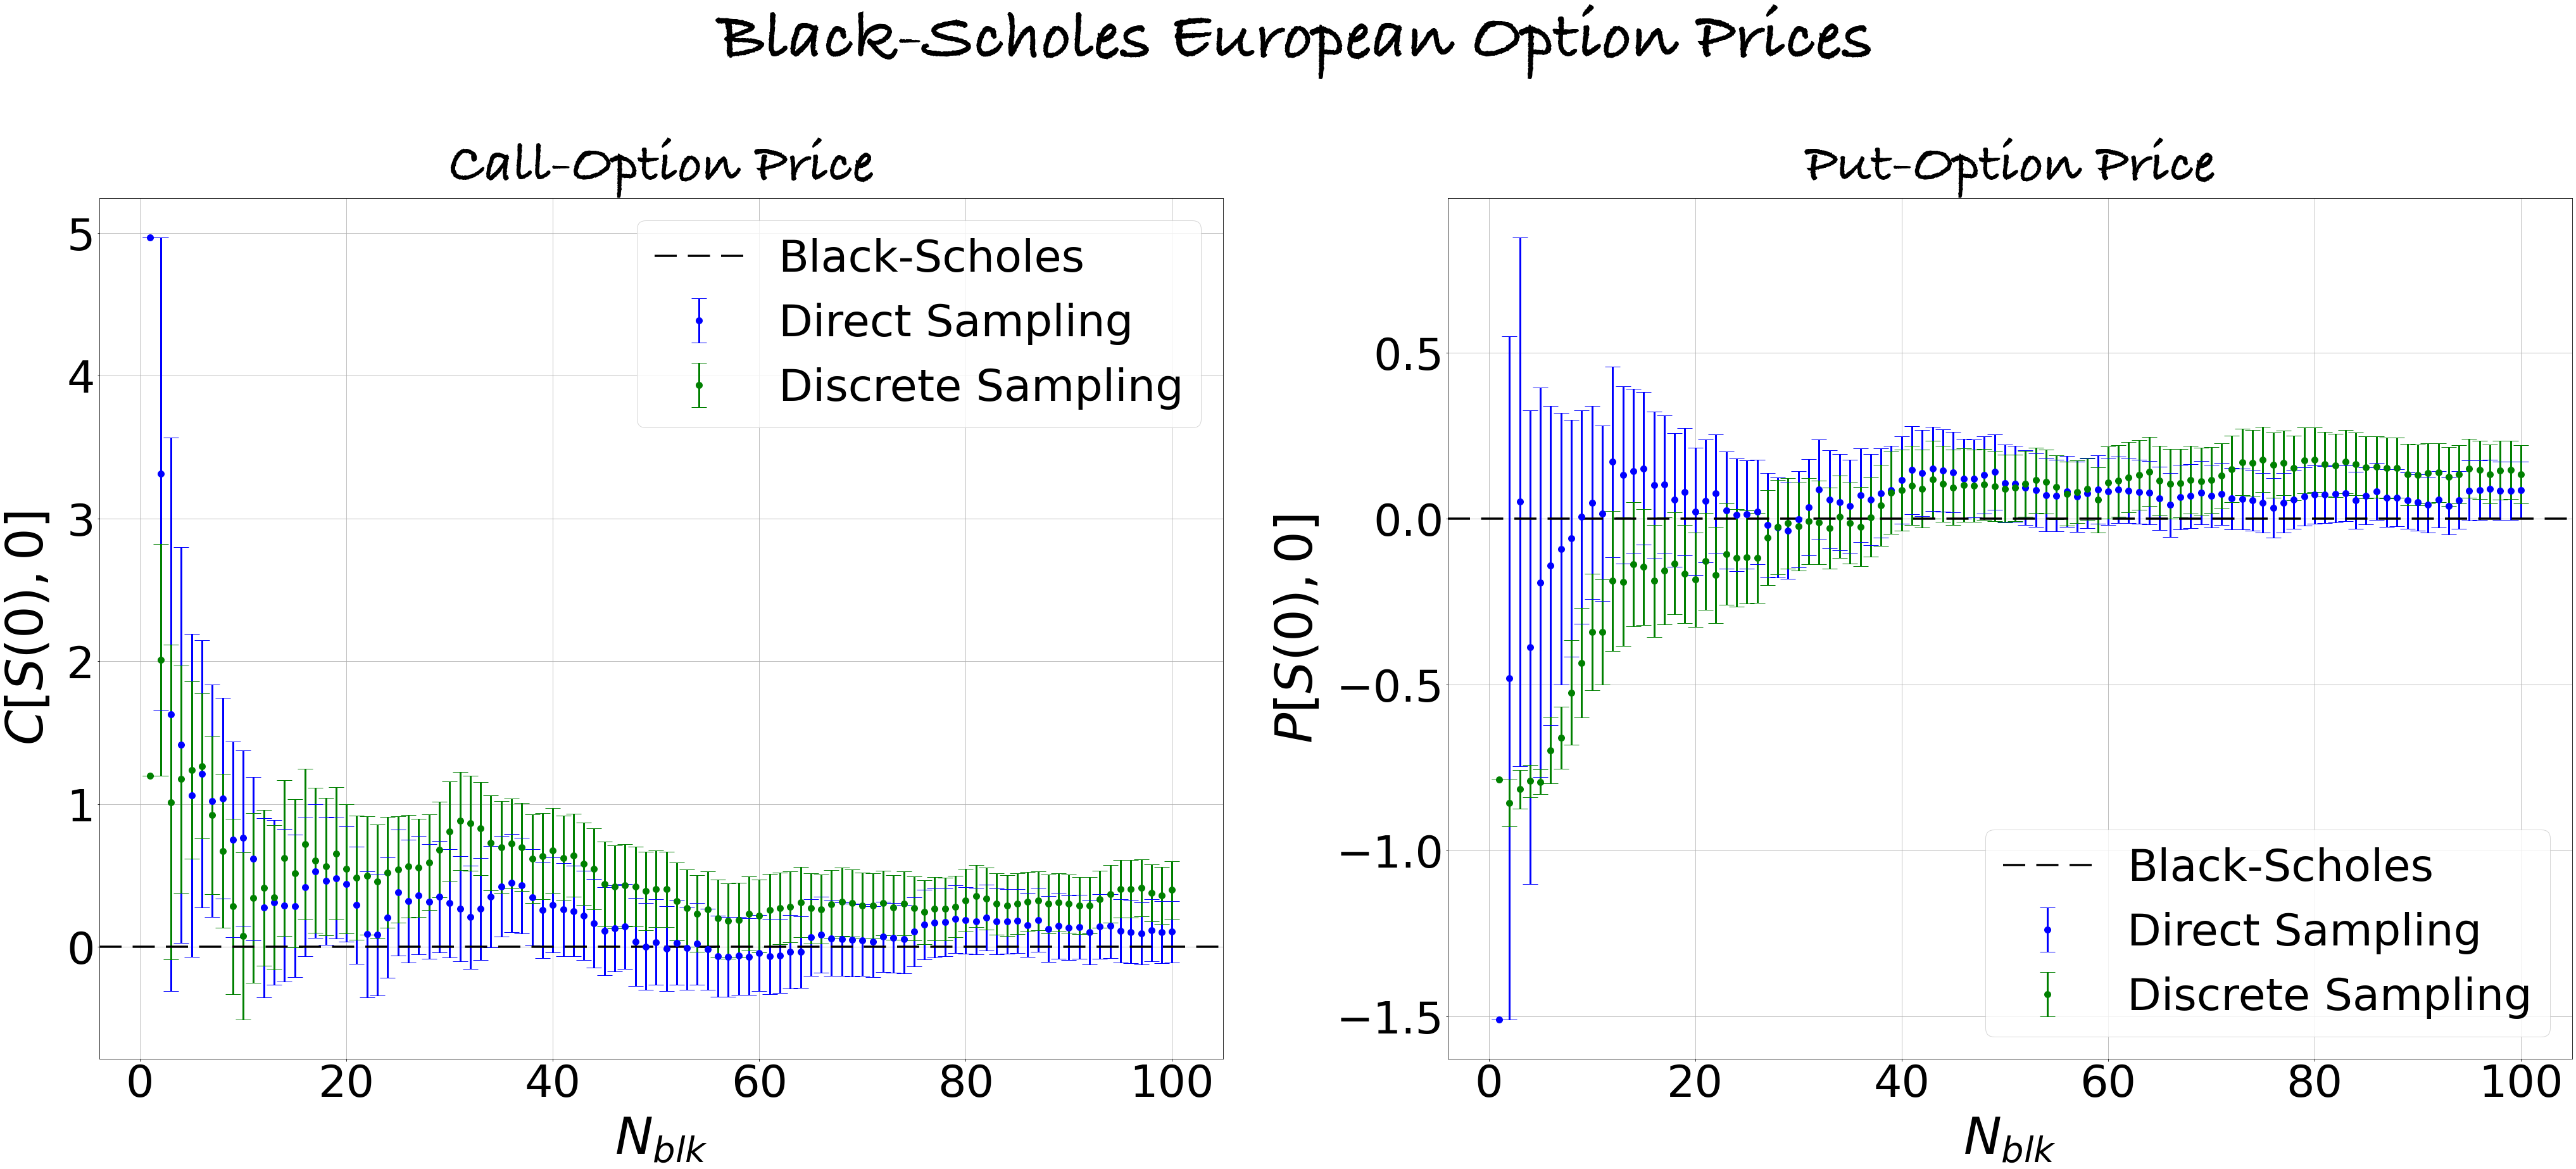

In [3]:
#Black-Scholes analytic solutions
C_th=14.976  #Call-option price
P_th=5.46  #Put-option price

#############################
#Call-option price
#############################
#load the data

N_blk=np.loadtxt("03.1/direct_sampling.dat", usecols=0, unpack=True)
C_dir, err_C_dir=np.loadtxt("03.1/direct_sampling.dat", usecols=(1,2), unpack=True)  #Directly sampling  
C_dis, err_C_dis=np.loadtxt("03.1/discrete_sampling.dat", usecols=(1,2), unpack=True)  #Discrete sampling

#plots
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)
plt.suptitle('Black-Scholes European Option Prices', y=1.05, fontname = 'Bradley Hand', fontsize=110)

plt.subplot(1, 2, 1)
plt.title('Call-Option Price', fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$N_{blk}$', fontsize=80, labelpad=15)
plt.ylabel('$C[S(0),0]$', fontsize=80, labelpad=20)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.errorbar(N_blk, C_dir-C_th, yerr=err_C_dir, fmt='ob', elinewidth=3.,
             markersize=10, capsize=12, label='Direct Sampling')
plt.errorbar(N_blk, C_dis-C_th, yerr=err_C_dis, fmt='og', elinewidth=3.,
             markersize=10, capsize=12, label='Discrete Sampling')
plt.axhline(y=0, color='k', linewidth=3.5, linestyle='--', dashes=(10, 5), label='Black-Scholes')
plt.legend(fontsize=70, loc='best')
plt.grid(True)


#############################
#Put-option price
#############################
#load the data
P_dir, err_P_dir=np.loadtxt("03.1/direct_sampling.dat", usecols=(3,4), unpack=True)  #Directly sampling
P_dis, err_P_dis=np.loadtxt("03.1/discrete_sampling.dat", usecols=(3,4), unpack=True)  #Discrete sampling

#plots
plt.subplot(1, 2, 2)
plt.title('Put-Option Price', fontname = 'Bradley Hand', fontsize=90)
plt.xlabel('$N_{blk}$', fontsize=80, labelpad=15)
plt.ylabel('$P[S(0),0]$', fontsize=80, labelpad=20)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.errorbar(N_blk, P_dir-P_th, yerr=err_P_dir, fmt='ob', elinewidth=3.0,
             markersize=10, capsize=12, label='Direct Sampling')
plt.errorbar(N_blk, P_dis-P_th, yerr=err_P_dis, fmt='og', elinewidth=3.0,
             markersize=10, capsize=12, label='Discrete Sampling')
plt.axhline(y=0, color='k', linewidth=3.5, linestyle='--', dashes=(10, 5), label='Black-Scholes')
plt.legend(fontsize=70, loc='best')
plt.grid(True)
plt.show()

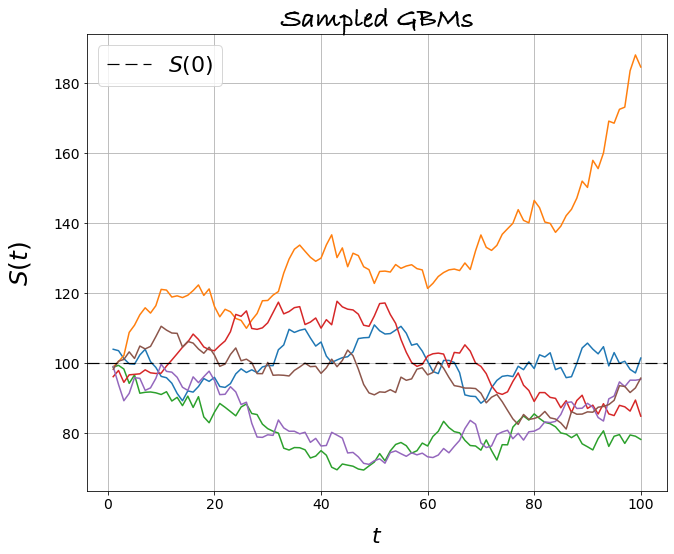

In [4]:
#############################
#Sampled GBM
#############################
#load the data
S_t=np.loadtxt("03.1/GBM.dat")
t=np.linspace(1, 100, 100)
print('\n\n')

#plots
plt.figure(figsize=[10.4, 8.4])  #deafult (6.4,4.8)
plt.title('Sampled GBMs', fontname = 'Bradley Hand', fontsize=28)
plt.xlabel('$t$', fontsize=22, labelpad=15)
plt.ylabel('$S(t)$', fontsize=25, labelpad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(t, S_t[:100])
plt.plot(t, S_t[100:200])
#plt.plot(t, S_t[200:300])
plt.plot(t, S_t[300:400])
plt.plot(t, S_t[400:500])
#plt.plot(t, S_t[500:600])
plt.plot(t, S_t[600:700])
#plt.plot(t, S_t[700:800])
plt.plot(t, S_t[800:900])
#plt.plot(t, S_t[900:1000])
plt.axhline(y=100, color='k', linewidth=1.2, linestyle='--', dashes=(10, 5), label='$S(0)$')
plt.grid(True)
plt.legend(fontsize=22, loc='best')
plt.show()

The results obtained from the Monte Carlo simulation of the GBM (both direct and discrete sampling) are compatible (within one sigma) with the values relative to Black-Scholes analytic solution (black line, first two figures).